In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import time

In [2]:
tf.get_logger().setLevel("ERROR")

## From Biological to Artificial Neurons

#### The Perceptron

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Implementing MLPs with Keras

#### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [5]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

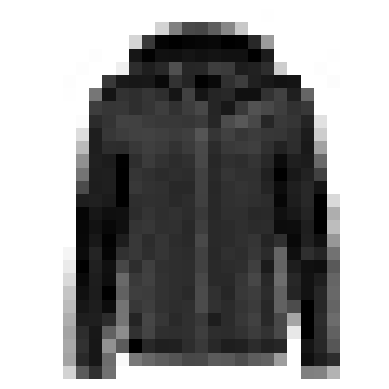

'Coat'

In [11]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

##### Creating the model using the Sequential API

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer("dense") is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

##### Compiling the model

In [21]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

##### Training and evaluating the model

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7079 - accuracy: 0.7688 - val_loss: 0.5208 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4853 - accuracy: 0.8294 - val_loss: 0.4387 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4424 - accuracy: 0.8434 - val_loss: 0.5403 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4167 - accuracy: 0.8536 - val_loss: 0.3969 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3980 - accuracy: 0.8607 - val_loss: 0.3770 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3793 - accuracy: 0.8669 - val_loss: 0.3739 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3665 - accuracy: 0.8709 - val_loss: 0.3710 - val_accuracy:

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
len(history.epoch)

30

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

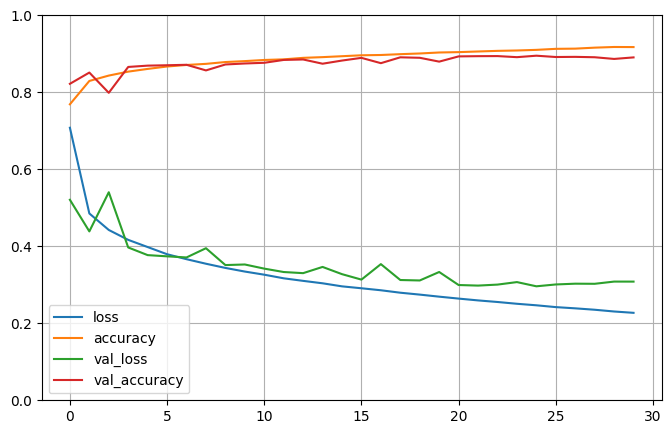

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.3432 - accuracy: 0.8771


[0.3432386517524719, 0.8770999908447266]

##### Using the model to make predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new, verbose=0)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = np.argmax(model.predict(X_new, verbose=0), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 928us/step - loss: 1.8356 - val_loss: 2.6982
Epoch 2/20
363/363 [==============================] - 0s 771us/step - loss: 0.7571 - val_loss: 0.7079
Epoch 3/20
363/363 [==============================] - 0s 805us/step - loss: 0.6628 - val_loss: 0.6442
Epoch 4/20
363/363 [==============================] - 0s 783us/step - loss: 0.6198 - val_loss: 0.5729
Epoch 5/20
363/363 [==============================] - 0s 796us/step - loss: 0.5831 - val_loss: 0.5588
Epoch 6/20
363/363 [==============================] - 0s 772us/step - loss: 0.5528 - val_loss: 0.5085
Epoch 7/20
363/363 [==============================] - 0s 754us/step - loss: 0.5295 - val_loss: 0.4852
Epoch 8/20
363/363 [==============================] - 0s 819us/step - loss: 0.5104 - val_loss: 0.4956
Epoch 9/20
363/363 [==============================] - 0s 771us/step - loss: 0.4934 - val_loss: 0.4556
Epoch 10/20
363/363 [==============================] - 0s 765us/step - loss: 0.480

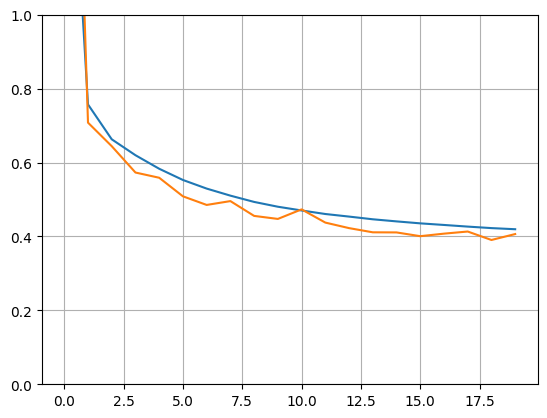

In [34]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 621us/step - loss: 0.4119


0.41190144419670105

In [36]:
X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.6580383],
       [1.5648515],
       [3.4855237]], dtype=float32)

In [37]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

#### Building Complex Models Using the Functional API

In [38]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [40]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [41]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [42]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9443 - val_loss: 2.1767
Epoch 2/20
363/363 [==============================] - 0s 871us/step - loss: 0.7624 - val_loss: 0.7358
Epoch 3/20
363/363 [==============================] - 0s 891us/step - loss: 0.6553 - val_loss: 0.6599
Epoch 4/20
363/363 [==============================] - 0s 857us/step - loss: 0.6054 - val_loss: 0.5810
Epoch 5/20
363/363 [==============================] - 0s 842us/step - loss: 0.5700 - val_loss: 0.5301
Epoch 6/20
363/363 [==============================] - 0s 893us/step - loss: 0.5422 - val_loss: 0.5186
Epoch 7/20
363/363 [==============================] - 0s 879us/step - loss: 0.5196 - val_loss: 0.5077
Epoch 8/20
363/363 [==============================] - 0s 907us/step - loss: 0.5024 - val_loss: 0.4720
Epoch 9/20
363/363 [==============================] - 0s 890us/step - loss: 0.4874 - val_loss: 0.4606
Epoch 10/20
363/363 [==============================] - 0s 869us/step - loss: 0.4759 

In [43]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 589us/step - loss: 0.4197


0.41967129707336426

In [44]:
y_pred = model.predict((X_new_A, X_new_B), verbose=0)
y_pred

array([[0.5334928],
       [2.0057049],
       [3.064087 ]], dtype=float32)

In [45]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.4210 - main_output_loss: 2.1753 - aux_output_loss: 4.6325 - val_loss: 3.7967 - val_main_output_loss: 3.7718 - val_aux_output_loss: 4.0211
Epoch 2/20
363/363 [==============================] - 0s 911us/step - loss: 0.9902 - main_output_loss: 0.7795 - aux_output_loss: 2.8872 - val_loss: 1.4360 - val_main_output_loss: 1.3213 - val_aux_output_loss: 2.4681
Epoch 3/20
363/363 [==============================] - 0s 895us/step - loss: 0.8069 - main_output_loss: 0.6714 - aux_output_loss: 2.0264 - val_loss: 0.9638 - val_main_output_loss: 0.8609 - val_aux_output_loss: 1.8900
Epoch 4/20
363/363 [==============================] - 0s 919us/step - loss: 0.7264 - main_output_loss: 0.6252 - aux_output_loss: 1.6367 - val_loss: 0.7789 - val_main_output_loss: 0.6855 - val_aux_output_loss: 1.6190
Epoch 5/20
363/363 [==============================] - 0s 959us/step - loss: 0.6774 - main_output_loss: 0.5918 - aux_output_loss: 1.4479 - 

In [46]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test]) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 590us/step - loss: 0.4732 - main_output_loss: 0.4246 - aux_output_loss: 0.9106


[0.47320684790611267, 0.4246082007884979, 0.9105966687202454]

In [47]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.45321345],
        [1.9756866 ],
        [3.2462976 ]], dtype=float32),
 array([[1.1753318],
        [2.0391417],
        [2.9773583]], dtype=float32))

#### Using the Subclassing API to Build Dynamic Models

In [48]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs, training=None, mask=None):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [49]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
          validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.8071 - output_1_loss: 2.6135 - output_2_loss: 4.5498 - val_loss: 1.4607 - val_output_1_loss: 1.2148 - val_output_2_loss: 3.6738
Epoch 2/20
363/363 [==============================] - 0s 894us/step - loss: 1.0071 - output_1_loss: 0.8334 - output_2_loss: 2.5700 - val_loss: 0.8499 - val_output_1_loss: 0.7072 - val_output_2_loss: 2.1343
Epoch 3/20
363/363 [==============================] - 0s 890us/step - loss: 0.7814 - output_1_loss: 0.6832 - output_2_loss: 1.6648 - val_loss: 0.8604 - val_output_1_loss: 0.7034 - val_output_2_loss: 2.2740
Epoch 4/20
363/363 [==============================] - 0s 882us/step - loss: 0.7020 - output_1_loss: 0.6300 - output_2_loss: 1.3495 - val_loss: 0.7542 - val_output_1_loss: 0.5776 - val_output_2_loss: 2.3441
Epoch 5/20
363/363 [==============================] - 0s 926us/step - loss: 0.6570 - output_1_loss: 0.5941 - output_2_loss: 1.2238 - val_loss: 0.7007 - val_output_1_loss: 0.5485 

In [50]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test)) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 572us/step - loss: 0.4694 - output_1_loss: 0.4334 - output_2_loss: 0.7934


[0.46941688656806946, 0.43341466784477234, 0.7934378981590271]

In [51]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.39435017],
        [1.7348846 ],
        [3.3655    ]], dtype=float32),
 array([[0.7689581],
        [1.7097168],
        [2.7322767]], dtype=float32))

#### Saving and Restoring a Model

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid));

Epoch 1/10
363/363 [==============================] - 1s 939us/step - loss: 2.1823 - val_loss: 0.8911
Epoch 2/10
363/363 [==============================] - 0s 821us/step - loss: 0.8043 - val_loss: 0.8167
Epoch 3/10
363/363 [==============================] - 0s 783us/step - loss: 0.7185 - val_loss: 0.7194
Epoch 4/10
363/363 [==============================] - 0s 826us/step - loss: 0.6630 - val_loss: 0.6228
Epoch 5/10
363/363 [==============================] - 0s 797us/step - loss: 0.6194 - val_loss: 0.5707
Epoch 6/10
363/363 [==============================] - 0s 837us/step - loss: 0.5811 - val_loss: 0.5445
Epoch 7/10
363/363 [==============================] - 0s 789us/step - loss: 0.5490 - val_loss: 0.5186
Epoch 8/10
363/363 [==============================] - 0s 815us/step - loss: 0.5213 - val_loss: 0.4823
Epoch 9/10
363/363 [==============================] - 0s 813us/step - loss: 0.4972 - val_loss: 0.4589
Epoch 10/10
363/363 [==============================] - 0s 818us/step - loss: 0.477

In [54]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 524us/step - loss: 0.4616


0.4615987241268158

In [55]:
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.78396815],
       [1.5268346 ],
       [3.0590672 ]], dtype=float32)

In [56]:
model.save("temp_model.keras")
model = keras.models.load_model("temp_model.keras")

In [57]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 536us/step - loss: 0.4616


0.4615987241268158

In [58]:
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.78396815],
       [1.5268346 ],
       [3.0590672 ]], dtype=float32)

#### Using Callbacks

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.keras", save_best_only=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb]);

Epoch 1/10
363/363 [==============================] - 1s 976us/step - loss: 2.1710 - val_loss: 1.2749
Epoch 2/10
363/363 [==============================] - 0s 864us/step - loss: 0.7515 - val_loss: 0.6382
Epoch 3/10
363/363 [==============================] - 0s 896us/step - loss: 0.6546 - val_loss: 0.5961
Epoch 4/10
363/363 [==============================] - 0s 897us/step - loss: 0.6124 - val_loss: 0.5632
Epoch 5/10
363/363 [==============================] - 0s 846us/step - loss: 0.5821 - val_loss: 0.5299
Epoch 6/10
363/363 [==============================] - 0s 835us/step - loss: 0.5532 - val_loss: 0.5075
Epoch 7/10
363/363 [==============================] - 0s 829us/step - loss: 0.5314 - val_loss: 0.4862
Epoch 8/10
363/363 [==============================] - 0s 820us/step - loss: 0.5120 - val_loss: 0.4692
Epoch 9/10
363/363 [==============================] - 0s 836us/step - loss: 0.4946 - val_loss: 0.4603
Epoch 10/10
363/363 [==============================] - 0s 835us/step - loss: 0.480

In [61]:
model = keras.models.load_model("temp_model.keras") # rollback to best model

In [62]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 535us/step - loss: 0.4425


0.4424857497215271

In [63]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4691 - val_loss: 0.4367
Epoch 2/100
363/363 [==============================] - 0s 856us/step - loss: 0.4583 - val_loss: 0.4280
Epoch 3/100
363/363 [==============================] - 0s 854us/step - loss: 0.4497 - val_loss: 0.4207
Epoch 4/100
363/363 [==============================] - 0s 851us/step - loss: 0.4404 - val_loss: 0.4394
Epoch 5/100
363/363 [==============================] - 0s 853us/step - loss: 0.4347 - val_loss: 0.4172
Epoch 6/100
363/363 [==============================] - 0s 796us/step - loss: 0.4273 - val_loss: 0.4213
Epoch 7/100
363/363 [==============================] - 0s 843us/step - loss: 0.4226 - val_loss: 0.4184
Epoch 8/100
363/363 [==============================] - 0s 835us/step - loss: 0.4178 - val_loss: 0.3982
Epoch 9/100
363/363 [==============================] - 0s 805us/step - loss: 0.4128 - val_loss: 0.4150
Epoch 10/100
363/363 [==============================] - 0s 856us/step - los

In [64]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 553us/step - loss: 0.3158


0.3158430755138397

In [65]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()

In [66]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), 
          callbacks=[val_train_ratio_cb], verbose=2);

Epoch 1/3
val/train: 0.99
363/363 - 0s - loss: 0.3338 - val_loss: 0.3308 - 317ms/epoch - 874us/step
Epoch 2/3
val/train: 1.02
363/363 - 0s - loss: 0.3337 - val_loss: 0.3420 - 302ms/epoch - 831us/step
Epoch 3/3
val/train: 0.97
363/363 - 0s - loss: 0.3333 - val_loss: 0.3228 - 282ms/epoch - 777us/step


#### Using TensorBoard for Visualization

```tensorboard --logdir=lab9/logs --port=6006```

In [67]:
def get_run_logdir():
    root_logdir = os.path.join(os.curdir, "logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\logs\\run_2024_03_11-14_06_14'

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [69]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, tensorboard_cb]);

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 2.1899 - val_loss: 0.8185
Epoch 2/30
363/363 [==============================] - 0s 896us/step - loss: 0.7207 - val_loss: 0.6771
Epoch 3/30
363/363 [==============================] - 0s 896us/step - loss: 0.6335 - val_loss: 0.5820
Epoch 4/30
363/363 [==============================] - 0s 914us/step - loss: 0.5944 - val_loss: 0.5718
Epoch 5/30
363/363 [==============================] - 0s 920us/step - loss: 0.5655 - val_loss: 0.5238
Epoch 6/30
363/363 [==============================] - 0s 995us/step - loss: 0.5388 - val_loss: 0.5021
Epoch 7/30
363/363 [==============================] - 0s 937us/step - loss: 0.5166 - val_loss: 0.4711
Epoch 8/30
363/363 [==============================] - 0s 896us/step - loss: 0.4963 - val_loss: 0.4621
Epoch 9/30
363/363 [==============================] - 0s 929us/step - loss: 0.4777 - val_loss: 0.4399
Epoch 10/30
363/363 [==============================] - 0s 922us/step - loss: 0.4620 

In [70]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\logs\\run_2024_03_11-14_06_25'

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [72]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-2))
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, tensorboard_cb]);

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7242 - val_loss: 5.6621
Epoch 2/30
363/363 [==============================] - 0s 927us/step - loss: 0.5052 - val_loss: 5.8412
Epoch 3/30
363/363 [==============================] - 0s 926us/step - loss: 0.4518 - val_loss: 0.3689
Epoch 4/30
363/363 [==============================] - 0s 962us/step - loss: 0.3916 - val_loss: 0.3702
Epoch 5/30
363/363 [==============================] - 0s 958us/step - loss: 0.3809 - val_loss: 0.3517
Epoch 6/30
363/363 [==============================] - 0s 920us/step - loss: 0.3729 - val_loss: 0.4076
Epoch 7/30
363/363 [==============================] - 0s 930us/step - loss: 0.3706 - val_loss: 0.3424
Epoch 8/30
363/363 [==============================] - 0s 921us/step - loss: 0.3611 - val_loss: 0.3446
Epoch 9/30
363/363 [==============================] - 0s 932us/step - loss: 0.3549 - val_loss: 0.3441
Epoch 10/30
363/363 [==============================] - 0s 922us/step - loss: 0.3510 

## Fine-Tuning Neural Network Hyperparameters

In [73]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=None):
    if input_shape is None:
        input_shape = [8]
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [74]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=None,
                           callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [75]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid));

Epoch 1/100
363/363 [==============================] - 0s 947us/step - loss: 1.4765 - val_loss: 34.8092
Epoch 2/100
363/363 [==============================] - 0s 773us/step - loss: 0.9504 - val_loss: 0.5966
Epoch 3/100
363/363 [==============================] - 0s 790us/step - loss: 0.5676 - val_loss: 0.5207
Epoch 4/100
363/363 [==============================] - 0s 794us/step - loss: 0.5097 - val_loss: 0.4814
Epoch 5/100
363/363 [==============================] - 0s 792us/step - loss: 0.4762 - val_loss: 0.4365
Epoch 6/100
363/363 [==============================] - 0s 758us/step - loss: 0.4497 - val_loss: 0.4217
Epoch 7/100
363/363 [==============================] - 0s 797us/step - loss: 0.4377 - val_loss: 0.4048
Epoch 8/100
363/363 [==============================] - 0s 772us/step - loss: 0.4279 - val_loss: 0.3984
Epoch 9/100
363/363 [==============================] - 0s 769us/step - loss: 0.4202 - val_loss: 0.3937
Epoch 10/100
363/363 [==============================] - 0s 784us/step - 

In [76]:
keras_reg.score(X_test, y_test) # R^2 value

162/162 [==============================] - 0s 465us/step


0.7154019174942132

In [77]:
y_pred = keras_reg.predict(X_new, verbose=0)
y_pred

array([0.6332307, 1.7227726, 3.7401533], dtype=float32)

In [78]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

keras_reg.verbose = 0
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid));

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.0016834549246003507, n_hidden=0, n_neurons=15; total time=   4.2s
[CV] END learning_rate=0.0016834549246003507, n_hidden=0, n_neurons=15; total time=  13.7s
[CV] END learning_rate=0.0016834549246003507, n_hidden=0, n_neurons=15; total time=   4.4s
[CV] END learning_rate=0.008731907739399207, n_hidden=0, n_neurons=21; total time=   2.3s
[CV] END learning_rate=0.008731907739399207, n_hidden=0, n_neurons=21; total time=   2.3s
[CV] END learning_rate=0.008731907739399207, n_hidden=0, n_neurons=21; total time=   2.4s
[CV] END learning_rate=0.0006154014789262349, n_hidden=2, n_neurons=87; total time=  12.3s
[CV] END learning_rate=0.0006154014789262349, n_hidden=2, n_neurons=87; total time=   5.1s
[CV] END learning_rate=0.0006154014789262349, n_hidden=2, n_neurons=87; total time=  21.9s
[CV] END learning_rate=0.00039200217714159834, n_hidden=3, n_neurons=24; total time=  21.8s
[CV] END learning_rate=0.000392

In [79]:
rnd_search_cv.best_params_

{'learning_rate': 0.003362564125268811, 'n_hidden': 2, 'n_neurons': 42}

In [80]:
rnd_search_cv.best_score_ # R^2 value

0.740032599365998

In [81]:
rnd_search_cv.best_estimator_

KerasRegressor(
	model=<function build_model at 0x000002CC6AFDF550>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x000002CC76BBCBB0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=2
	n_neurons=42
	learning_rate=0.003362564125268811
	input_shape=None
)

In [82]:
rnd_search_cv.score(X_test, y_test) # R^2 value

0.7597586636871632

In [83]:
rnd_search_cv.predict(X_new)

array([0.43724263, 1.4421893 , 4.666888  ], dtype=float32)